# Walmart Weekly Sales Forecasting

In [60]:
#For data import, basic operations and visualisations
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas_profiling as pp
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Quick Function to check for missing Values
def  Missing_Inspection(x):
    return pd.Series([x.count(),x.isnull().sum()],index = ['N',"NMISS"])

#UDF to Create Numerical Data Audit Report
def  num_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index = ['N',"NMISS","SUM",'MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])

# UDF to create categorical data audit report
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()], index=['N','NMISS','ColumnsName'])

# Data Loading

In [12]:
train = pd.read_csv(r'C:\Users\HP\Downloads\py\Walmart Sales Forecasting/trainwm.csv')
feature = pd.read_csv(r'C:\Users\HP\Downloads\py\Walmart Sales Forecasting/features.csv')
test = pd.read_csv(r'C:\Users\HP\Downloads\py\Walmart Sales Forecasting/testwm.csv')
stores = pd.read_csv(r'C:\Users\HP\Downloads\py\Walmart Sales Forecasting/stores.csv')

In [13]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [14]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [20]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Data Preparation

# Creating a complete dataframe to work with

- Merging train, store and features
- Merging test, store and features

In [15]:
# Merging Train dataset
train_1=pd.merge(train, stores)
train=pd.merge(train_1, feature, on=["Store","Date",'IsHoliday'])
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [16]:
# Merging Test dataset
test_1=pd.merge(test, stores)
test=pd.merge(test_1, feature, on=["Store","Date",'IsHoliday'])
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


# Spliting numeric and Categorical data from train

In [25]:
###Train Numerical Data
train_num=train.select_dtypes(include=['float64', 'float32','int32','int64'])

###Train Categorical Data
train_cat = train.select_dtypes(include=['object', 'O'])

In [29]:
writer=pd.ExcelWriter('Walmart_Sales.xlsx')

In [30]:
# Numerical Summary for Train Data Set
num_summary = train_num.apply(num_var_summary).T
num_summary.to_excel(writer,'num_var_summ_train',index=True)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [31]:
# train Categorical Summary
cat_summary_train = train_cat.apply(cat_summary).T
cat_summary_train.to_excel(writer,'cat_summ_train', index=True)
cat_summary_train

,N,NMISS,ColumnsName
Date,421570,0,2011-12-23 3027 2011-11-25 3021 2011-12-...
Type,421570,0,A 215478 B 163495 C 42597 Name: Type...


# Splitting Categorical and Numerical Data for test dataset

In [32]:
###Test Numerical Data
test_num=test.select_dtypes(include=['float64', 'float32','int32','int64'])

###Test Categorical Data
test_cat = test.select_dtypes(include=['object', 'O'])

In [33]:
num_summary_test = test_num.apply(num_var_summary).T
num_summary_test.to_excel(writer,'num_var_summ_test',index=True)
num_summary_test

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,39690.0000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,-2781.450000,20.840000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,-35.740000,0.020000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,-179.260000,0.150000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,0.220000,2.610000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000


In [34]:
# test Categorical Summary
cat_summary_test = test_cat.apply(cat_summary).T
cat_summary_test.to_excel(writer,'cat_summ_test', index=True)
cat_summary_test

,N,NMISS,ColumnsName
Date,115064,0,2012-12-21 3002 2012-12-07 2989 2012-12-...
Type,115064,0,"A 58713 B 44500 C 11851 Name: Type, d..."


# Correlation

In [35]:
train_corr = pd.DataFrame(train.corr())
train_corr.to_excel(writer,'train_data_corr',index = True)
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


<AxesSubplot:>

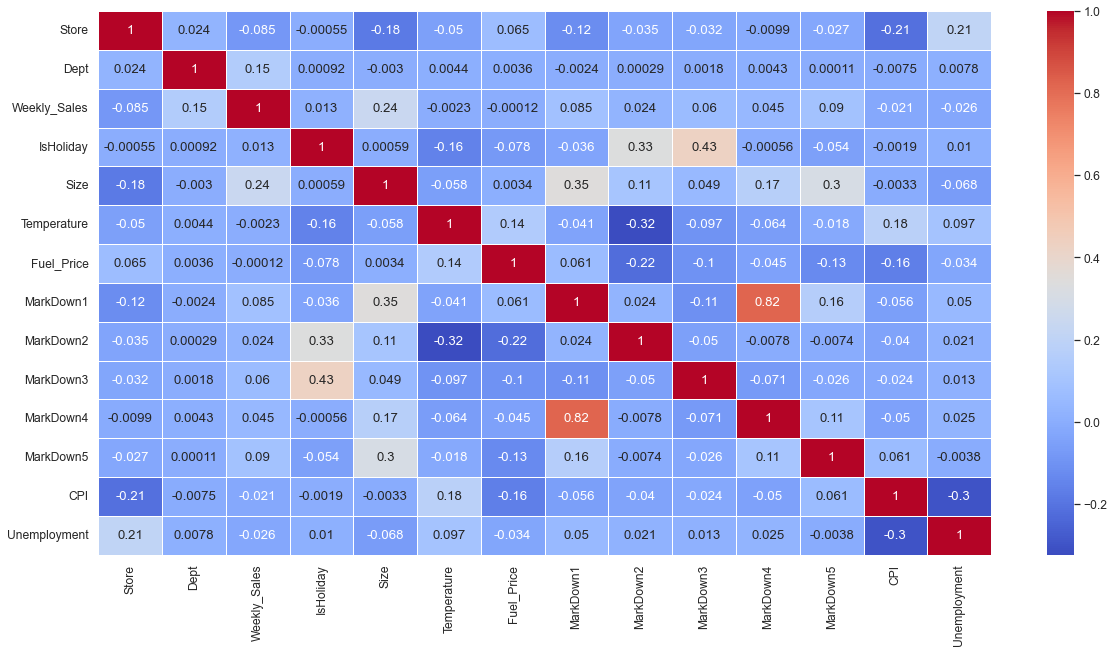

In [36]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(train.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

# Key Observations:
- MarkDown 5 is highly skewed

- MarkDown 1 and 4 are highly correlated

In [37]:
test_corr = pd.DataFrame(test.corr())
test_corr.to_excel(writer,'test_data_corr',index = True)
test_corr

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


<AxesSubplot:>

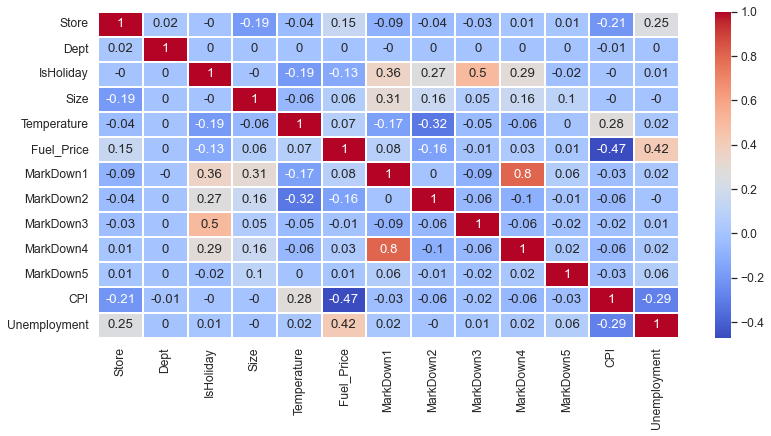

In [38]:
sns.set(rc={'figure.figsize':(13,6)}, font_scale=1.1)
sns.heatmap((test.corr()).round(2),linewidths=0.25,annot=True,cmap='coolwarm')

# Exploratory Data Analysis

<AxesSubplot:>

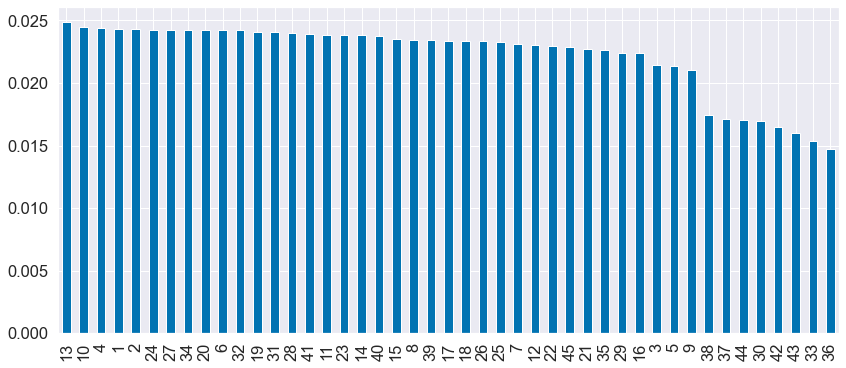

In [39]:
sns.set(rc={'figure.figsize':(14,6)}, palette="colorblind", font_scale=1.5)
train['Store'].value_counts(normalize=True).plot(kind = 'bar')

- Store 13 are more, store 36 are less

# Distribution of Weekly Sales-y variable

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

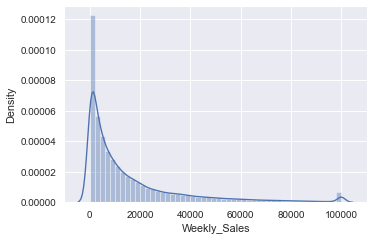

In [61]:
plt.figure(dpi=65)
sns.distplot(train.Weekly_Sales)

- Highly Skewed
- Gives the idea, most of the outliers are after 100000, this simplifies outlier capping

# Sales based on Store

<AxesSubplot:>

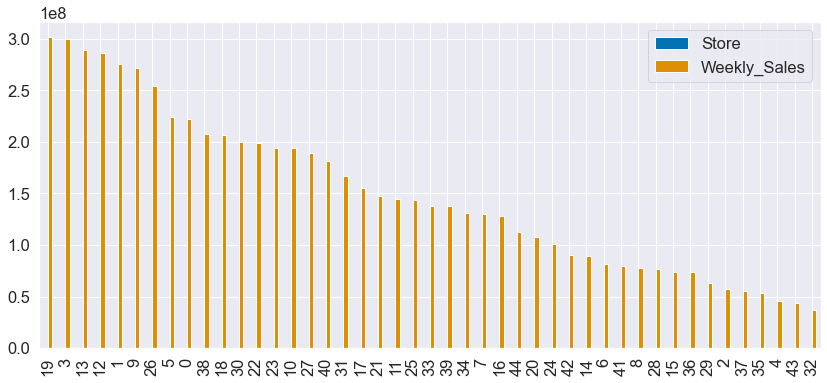

In [41]:
train.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')


# Sales based on Type

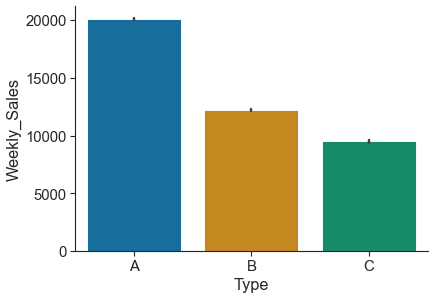

In [42]:
plt.figure(figsize=(7,5),dpi=65)
sns.set_style('ticks')
sns.barplot(y=train["Weekly_Sales"],x=train["Type"],palette='colorblind')
sns.despine()

- 'type C' stores have less sales and 'type A' stores have more sales in general.

# Department wise Sales Visualization

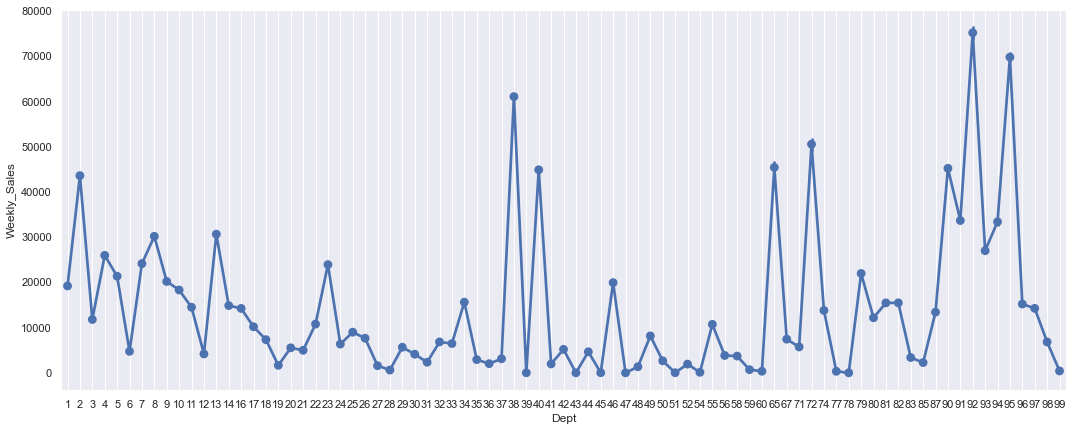

In [43]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,7)})
sns.pointplot(x='Dept', y='Weekly_Sales',data=train)
plt.grid()

- Dept. with highest weekly sales is 92

# Missing Value Inspection

In [44]:
train.apply(Missing_Inspection).T

,N,NMISS
Store,421570,0
Dept,421570,0
Date,421570,0
Weekly_Sales,421570,0
IsHoliday,421570,0
Type,421570,0
Size,421570,0
Temperature,421570,0
Fuel_Price,421570,0
MarkDown1,150681,270889


In [45]:
test.apply(Missing_Inspection).T

,N,NMISS
Store,115064,0
Dept,115064,0
Date,115064,0
IsHoliday,115064,0
Type,115064,0
Size,115064,0
Temperature,115064,0
Fuel_Price,115064,0
MarkDown1,114915,149
MarkDown2,86437,28627


# Negative Value Inspection

In [46]:
print(train_num.apply(num_var_summary).T['MIN']<0)
print('\n','.><.'*7)
print(test_num.apply(num_var_summary).T['MIN']<0)

Store           False
Dept            False
Weekly_Sales     True
Size            False
Temperature      True
Fuel_Price      False
MarkDown1       False
MarkDown2        True
MarkDown3        True
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Name: MIN, dtype: bool

 .><..><..><..><..><..><..><.
Store           False
Dept            False
Size            False
Temperature      True
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4       False
MarkDown5        True
CPI             False
Unemployment    False
Name: MIN, dtype: bool


- Since sales and promotional offers (Markdown 2 and 3) cannot be negative, we will replace negative values with 0
- Assuming there is no offer if not recorded, we can safely replace np.NAN with 0 in case of Markdowns
- In case of test filling CPI and Unemploymrnt by mean values

In [47]:
#1 negative Value Cleaning for both train and test dataset
train.loc[train['Weekly_Sales'] < 0 ,'Weekly_Sales'] = 0
train.loc[train['MarkDown2'] < 0 ,'MarkDown2'] = 0
train.loc[train['MarkDown3'] < 0, 'MarkDown3'] = 0
test.loc[test['MarkDown1'] < 0 ,'MarkDown1']= 0
test.loc[test['MarkDown2'] < 0, 'MarkDown2'] = 0
test.loc[test['MarkDown3'] < 0 ,'MarkDown3']= 0
test.loc[test['MarkDown5'] < 0 ,'MarkDown5']= 0

In [48]:
#2 Missing Value treatment for "test" Other than Markdowns
test['CPI'] = test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment'] = test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [49]:
#3 Now we can Fill NAN Markdowns with 0
train = train.fillna(0)
test = test.fillna(0)

In [50]:
train.apply(Missing_Inspection).T

,N,NMISS
Store,421570,0
Dept,421570,0
Date,421570,0
Weekly_Sales,421570,0
IsHoliday,421570,0
Type,421570,0
Size,421570,0
Temperature,421570,0
Fuel_Price,421570,0
MarkDown1,421570,0


In [51]:
test.apply(Missing_Inspection).T

,N,NMISS
Store,115064,0
Dept,115064,0
Date,115064,0
IsHoliday,115064,0
Type,115064,0
Size,115064,0
Temperature,115064,0
Fuel_Price,115064,0
MarkDown1,115064,0
MarkDown2,115064,0


# Outlier Treatment

In [52]:
train['Weekly_Sales'] = np.where(train['Weekly_Sales']>100000,100000,train['Weekly_Sales'])
#We cannot do this on test obviously

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

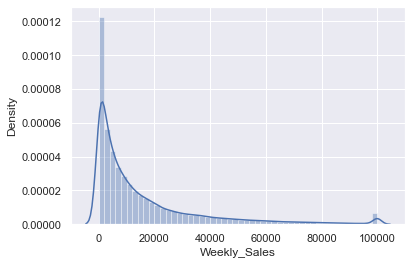

In [62]:
sns.distplot(train.Weekly_Sales)

# Feature Extraction

Creating new features in training dataset



- Temperature is in farehnheit, changing it to celcuis scale

In [55]:
train['Temperature'] = (train['Temperature'] - 32) * 5/9
test['Temperature'] = (test['Temperature'] - 32) * 5/9

In [56]:
train["Date"].dtype

dtype('O')

In [57]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [63]:
#### Extracting date features
train["Date"]=pd.to_datetime(train["Date"])
train["Day"]=train['Date'].dt.day
train["Week"]=train['Date'].dt.week
train["Month"]=train['Date'].dt.month
train["Year"]=train['Date'].dt.year

test["Day"]=test['Date'].dt.day
test["Week"]=test['Date'].dt.week
test["Month"]=test['Date'].dt.month
test["Year"]=test['Date'].dt.year

In [59]:
#SUPERBOWL DATES
s_1=np.datetime64('2010-02-12')
s_2=np.datetime64('2011-02-11')
s_3=np.datetime64('2012-02-10')
s_4=np.datetime64('2013-02-08')

#labor day
l_1=np.datetime64('2010-09-10')
l_2=np.datetime64('2011-09-09')
l_3=np.datetime64('2012-09-07')
l_4=np.datetime64('2013-09-06')

#thanksgiving
t_1=np.datetime64('2010-11-26')
t_2=np.datetime64('2011-11-25')
t_3=np.datetime64('2012-11-23')
t_4=np.datetime64('2013-11-29')

#christams day
c_1=np.datetime64('2010-12-31')
c_2=np.datetime64('2011-12-30')
c_3=np.datetime64('2012-12-28')
c_4=np.datetime64('2013-12-27')

In [64]:
#Creating new variables on train data

train['Superbowl']=np.where(((train.Date==s_1) | (train.Date==s_2) |
                                  (train.Date==s_3) | (train.Date==s_4)),1,0)

train['labor']= np.where(((train.Date==l_1) | (train.Date==l_2) |
                                  (train.Date==l_3) | (train.Date==l_4)),1,0)

train['thanksgiving']=np.where(((train.Date==t_1) | (train.Date==t_2) |
                                  (train.Date==t_3) | (train.Date==t_4)),1,0)

train['christmas']=np.where(((train.Date==c_1) | (train.Date==c_2) |
                             (train.Date==c_3) | (train.Date==c_4)),1,0)

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,2,2010-02-05,50605.27,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
2,1,3,2010-02-05,13740.12,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
3,1,4,2010-02-05,39954.04,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
4,1,5,2010-02-05,32229.38,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0


In [65]:
#Creating new variables on test data
test['Superbowl']=np.where(((test.Date==s_1) | (test.Date==s_2) |
                                  (test.Date==s_3) | (test.Date==s_4)),1,0)

test['labor']= np.where(((test.Date==l_1) | (test.Date==l_2) |
                                  (test.Date==l_3) | (test.Date==l_4)),1,0)

test['thanksgiving']=np.where(((test.Date==t_1) | (test.Date==t_2) |
                                  (test.Date==t_3) | (test.Date==t_4)),1,0)

test['christmas']=np.where(((test.Date==c_1) | (test.Date==c_2) |
                             (test.Date==c_3) | (test.Date==c_4)),1,0)

test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


In [66]:
#converting IsHoliday variables from true/false to 1/0 on train data
train['IsHoliday']=np.where((train.IsHoliday==True),1,0)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,2,2010-02-05,50605.27,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
2,1,3,2010-02-05,13740.12,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
3,1,4,2010-02-05,39954.04,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
4,1,5,2010-02-05,32229.38,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0


In [67]:
#converting IsHoliday variables from true/false to 1/0 on test data
test['IsHoliday']=np.where((test.IsHoliday==True),1,0)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


# Changing the values of Isholiday Columns according to special holidays

In [68]:
train['IsHoliday']=train['IsHoliday']|train['Superbowl']|train['labor']|train['thanksgiving']|train['christmas']
test['IsHoliday']=test['IsHoliday']|test['Superbowl']|test['labor']|test['thanksgiving']|test['christmas']

# Dropping the extra columns as they now are redundant



In [69]:
dplist=['Superbowl', 'labor', 'thanksgiving', 'christmas']
train.drop(dplist,inplace=True,axis=1)
test.drop(dplist,inplace=True,axis=1)


In [70]:
train=pd.get_dummies(train, drop_first=True)
test=pd.get_dummies(test,drop_first=True)

<AxesSubplot:>

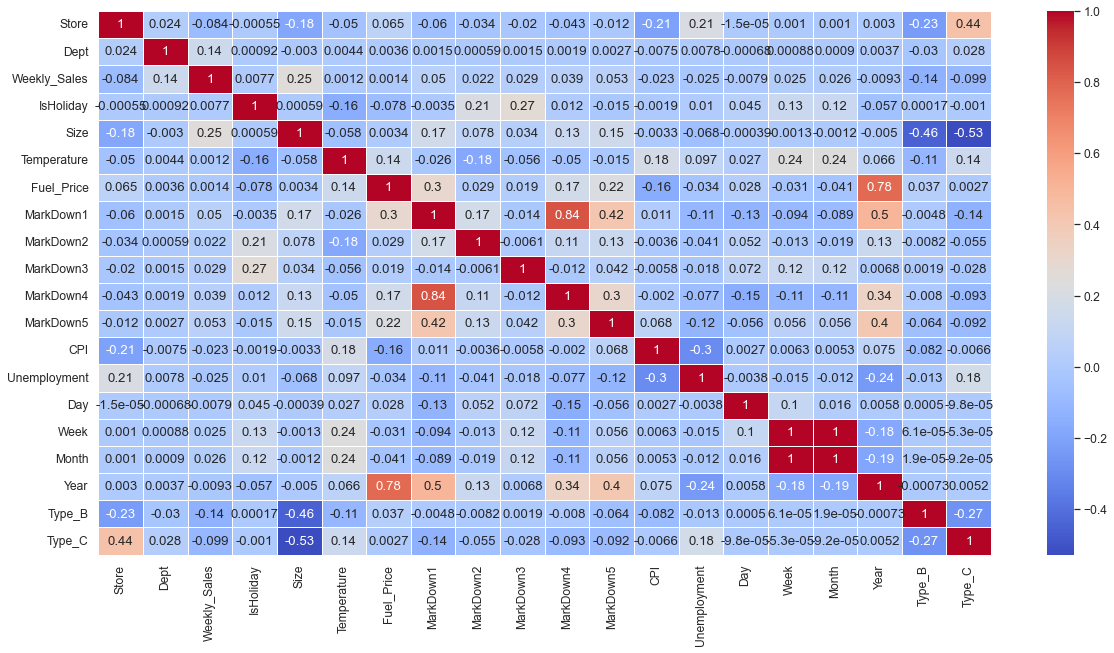

In [71]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(train.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

<AxesSubplot:>

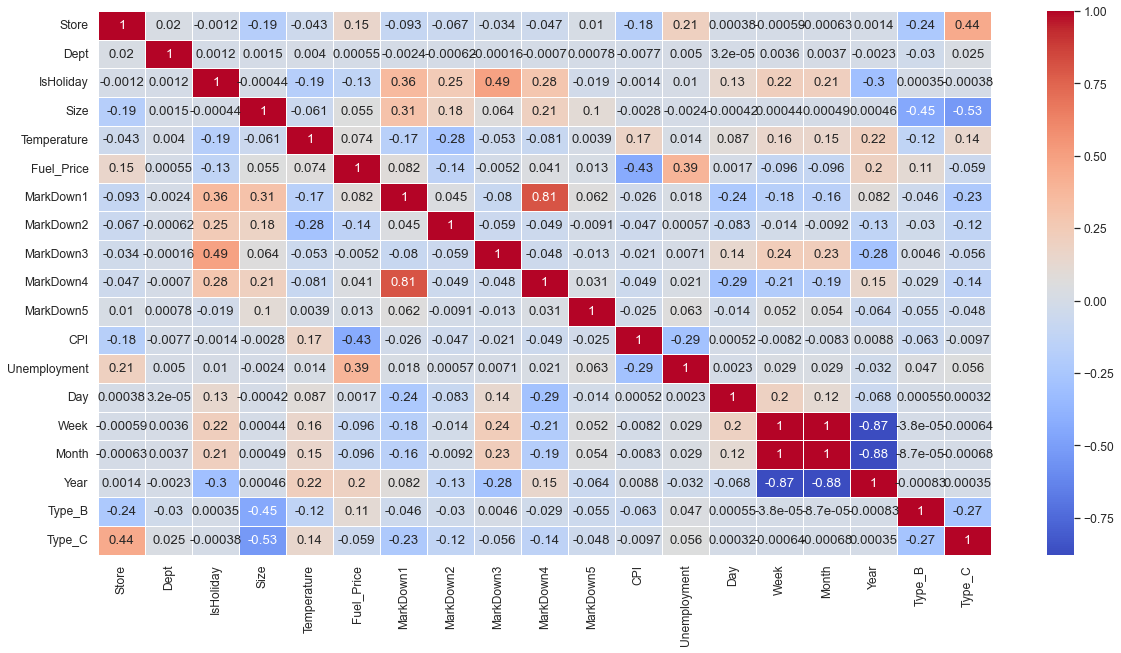

In [72]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(test.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

# Observations:

- Markdown 4 is highly correlated to Markdown 1
- Fuel Price is highly correlated to Year (It must be)
- Size and Type are negatively correlated
- Unemployment, CPI are correlated
- Temperature is negatively correlated to unemployment
- Week Month Day Quarter are all messing up
- Correlated features and skewed must be deleted

In [73]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month',
       'Year', 'Type_B', 'Type_C'],
      dtype='object')

In [74]:
dpcol=['MarkDown1', 'MarkDown5', 'Year' , 'Day', 'Month' , 'CPI', 'Unemployment'] 
train.drop(dpcol,inplace=True,axis=1)
test.drop(dpcol,inplace=True,axis=1)

In [76]:
# Converting all float var int integer..
for var in train:
    if train[var].dtypes == float:
        train[var]=train[var].astype(int)
        
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)

# Train and Test Definition
- Defining training and testing dataset

In [78]:
#   train X= vxery thing except Weekly_Sales and Date offcourse
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#  train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 12), (421570,), (115064, 12))

# Building Models

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [80]:
lm = LinearRegression(n_jobs=-1)
lm.fit(train_X,train_y)

LinearRegression(n_jobs=-1)

In [81]:
y_pred =lm.predict(test_X)
acc_lm = round(lm.score(train_X,train_y)* 100,2)
print('Accuracy of Linear Regression model: ' +str(acc_lm)+'%')

Accuracy of Linear Regression model: 9.05%


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

**Hyperparameter Tunning with RandomizedSearchCV**

In [84]:

n_estimators = [10,15,20,30] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [2,3,5,10,20] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


In [85]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [86]:
rf = RandomForestRegressor()

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [90]:
rf_random.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [10, 15, 20, 30]},
                   random_state=35, verbose=2)

In [91]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [93]:
# Using best parameters
randmf = RandomForestRegressor(n_estimators= 15, min_samples_split= 6, min_samples_leaf= 4, max_features= 'auto', max_depth= 20, bootstrap= True)


In [94]:
randmf.fit( train_X, train_y) 

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      min_samples_split=6, n_estimators=15)

In [95]:
y_pred_rf = randmf.predict(test_X)

In [96]:
acc_rf = round(randmf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

Accuracy of Random Forest model: 98.83%


In [97]:
# Random forest determined feature importances
randmf.feature_importances_

array([0.06849265, 0.67401378, 0.00102023, 0.19654301, 0.00717137,
       0.00213968, 0.00073226, 0.00156176, 0.00262403, 0.03031364,
       0.01389027, 0.00149733])

In [98]:
importance = randmf.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, train_X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['Dept', 'Size', 'Store', 'Week', 'Type_B', 'Temperature', 'MarkDown4', 'Fuel_Price', 'MarkDown3', 'Type_C', 'IsHoliday', 'MarkDown2']


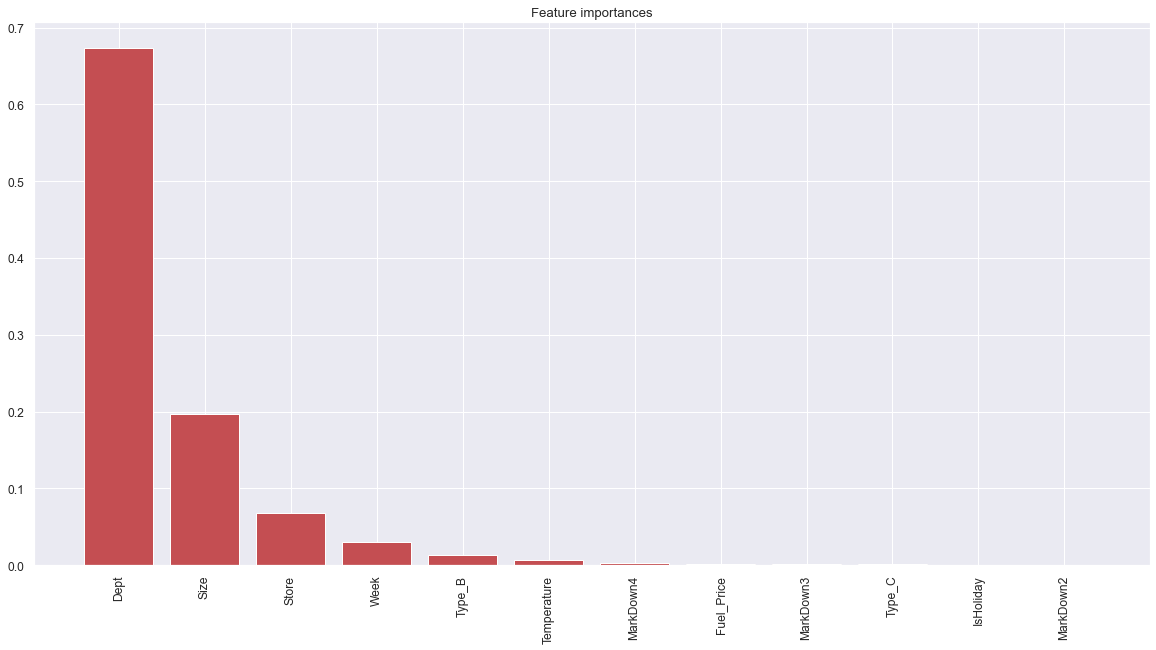

In [99]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

# XGBoost Regressor

In [100]:
from xgboost.sklearn import XGBRegressor

In [101]:
xg_model = XGBRegressor(n_estimators=100, seed = 1234)
param_dict = {'max_depth': [3,4,5],
              'min_child_weight': [2,3,4],
              'learning_rate': [0.05, 0.1,0.15],
              'gamma': [0.0, 0.1, 0.2]
}


**Hyperparameter Tunning with RandomizedSearchCV**

In [102]:
xgboost_random = RandomizedSearchCV(estimator = xg_model,param_distributions = param_dict,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [103]:
xgboost_random.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.05, 0.1, 0.15],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [2, 3, 4]},
                   random_state=35, verbose=2)

In [104]:
xgboost_random.best_params_

{'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1}

In [113]:
# Training on best model
xg_model = XGBRegressor(n_estimators = 100,
                        learning_rate = 0.15,
                        max_depth = 5,
                        min_child_weight = 2,
                        gamma = 0.1)

In [114]:
xg_model.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [119]:
y_pred_xg= xg_model.predict(test_X) 

In [116]:
acc_xg = round(xg_model.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_xg) +'%')

Accuracy of Random Forest model: 90.37%


# Comparing Models

In [117]:
models = pd.DataFrame({'Model':['Linear Regression','Random Forest','XGBoost'],
                      'Score':[acc_lm,acc_rf,acc_xg]})
models.sort_values(by='Score',ascending= False)

,Model,Score
1,Random Forest,98.83
2,XGBoost,90.37
0,Linear Regression,9.05


# Predicting Weekly Sales value for test data based on RF and XGboost

In [120]:
#Predicting values
submission = pd.DataFrame({
    'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
    'Weekly_Sales_rf': y_pred_rf , 'Weekly_sales_xg' : y_pred_xg})
submission.to_csv('weekly_sales Predicted.csv',index=False)
# submission.to_excel(writer,'Weekly_sales Pred',index = False)-- Not working

In [121]:
submission.head()

,Store_Dept_Date,Weekly_Sales_rf,Weekly_sales_xg
0,1_1_2012-11-02,33306.781076,26358.853516
1,1_2_2012-11-02,47935.414060,46480.261719
2,1_3_2012-11-02,12589.606824,12385.860352
3,1_4_2012-11-02,39222.213439,32525.351562
4,1_5_2012-11-02,29484.045556,25504.361328


In [122]:
writer.save()